# **IMPORT LIBRARY**

In [63]:
# Manipulasi data
import pandas as pd
# Komputasi numerik dan operasi array
import numpy as np
# Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
# Split dataset
from sklearn.model_selection import train_test_split
# Standarisasi fitur
from sklearn.preprocessing import StandardScaler
# Validasi silang
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Metrik evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
# Tuning parameter
from sklearn.model_selection import GridSearchCV
# KNN
from sklearn.neighbors import KNeighborsClassifier
# SVM
from sklearn.svm import SVC

# **DATA**

In [3]:
# Membaca data
data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
# Menampilkan jumlah baris dan kolom
print(data.shape)

(1190, 12)


# **EKSPLORATORY DATA ANALYSIS**

In [4]:
# Menampilkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
# Menampilkan data awal
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


**Visualisasi Data Numerik**

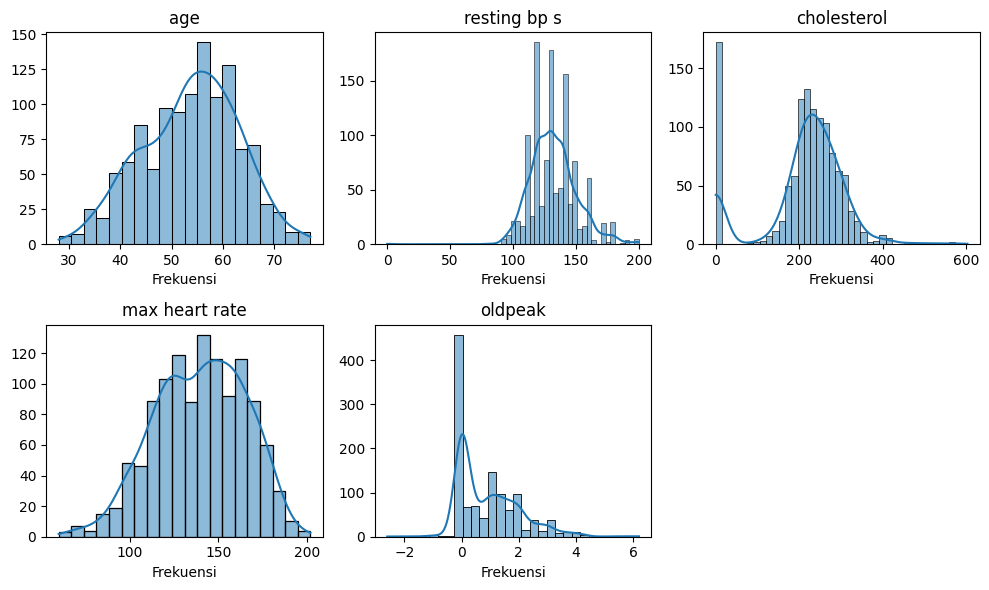

In [6]:
## Menampilkan histogram ##
# Membuat objek gambar
plt.figure(figsize=(10,6))
# Kolom numerik
kolom_numerik = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
# Looping for untuk mendapatkan indeks fitur dengan nilai kolomnya
for i, column in enumerate(kolom_numerik):
  # Membuat subplot dengan ukuran 2 baris 3 kolom
  plt.subplot(2,3,i+1)
  # Membuat histogram
  sns.histplot(data = data, x = column, kde = True)
  # Menampilkan judul subplot
  plt.title(column, fontsize = 12)
  plt.xlabel('Frekuensi')
  plt.ylabel('')
  # Mengatur tata letak subplot
  plt.tight_layout();

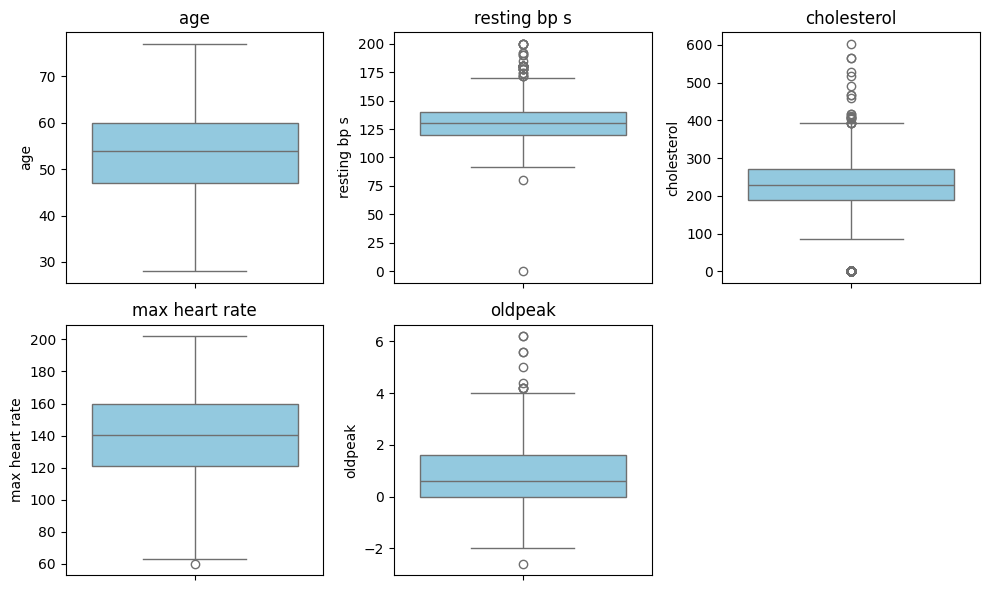

In [7]:
## Menampilkan boxplot ##
# Membuat objek gambar
plt.figure(figsize=(10, 6))
# Kolom numerik
kolom_numerik = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
# Looping for untuk mendapatkan indeks fitur dengan nilai kolomnya
for i, column in enumerate(kolom_numerik):
    # Membuat subplot dengan ukuran 2 baris 3 kolom
    plt.subplot(2, 3, i + 1)
    # Membuat boxplot
    sns.boxplot(data=data, y=column, color='skyblue')
    plt.title(column, fontsize=12)
    plt.xlabel('')
    plt.ylabel(column, fontsize=10)
    plt.tight_layout()

**Visualisasi Data Kategorik**

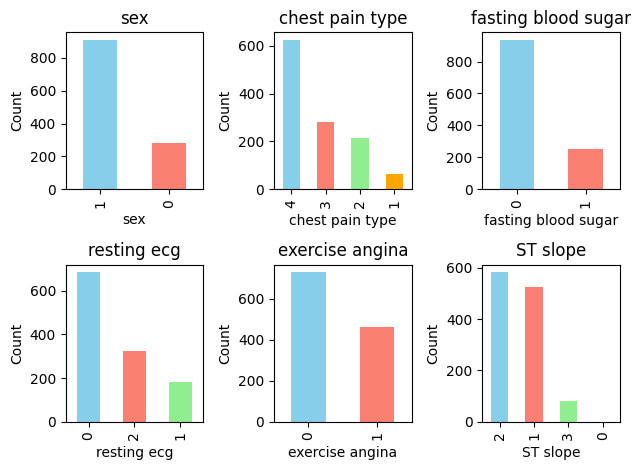

In [8]:
## Menampilkan diagram batang ##
# Kolom kategorik
kolom_kategorik = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']
# Daftar warna plot
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'cornflowerblue']
# Looping for untuk mendapatkan indeks fitur dengan nilai kolomnya
for i, column in enumerate(kolom_kategorik):
    plt.subplot(2, 3, i + 1)
    if column == 'exercise angina':
        # Membuat diagram batang
        data[column].value_counts().plot(kind='bar', color=colors)
    else:
        # Membuat diagram batang
        data[column].value_counts().plot(kind='bar', color=colors)
    plt.title(column, fontsize=12)
    plt.ylabel('Count')
    plt.tight_layout()

**Visualisasi Target**

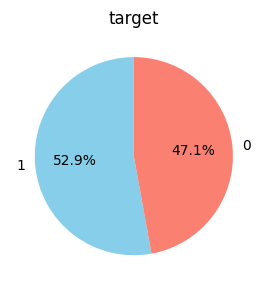

In [9]:
## Menampilkan pie chart ##
# Membuat objek gambar
plt.figure(figsize=(3, 3))
# Membuat pie chart
data['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('target', fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.show()

**Korelasi**

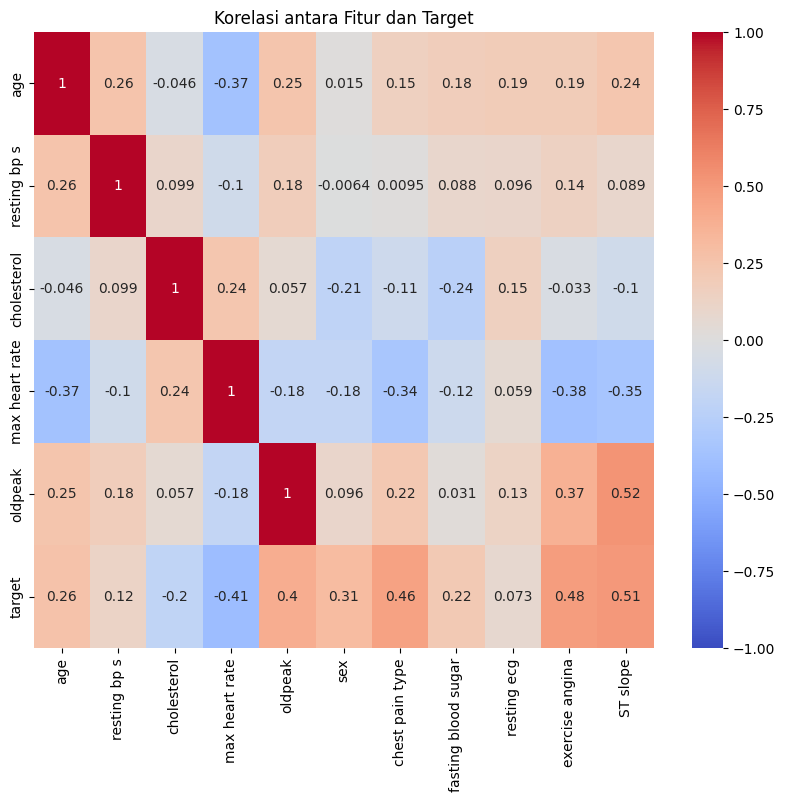

In [10]:
## Plot korelasi ##
# Daftar variabel numerik
variabel_numerik = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
# Daftar variabel kategorikal
variabel_kategorik = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']
# Gabungan variabel
variables = variabel_numerik + variabel_kategorik
# Korelasi antara variabel numerik dan target
kor = data[variables + ['target']].corr()
# Plot heatmap dari korelasi
plt.figure(figsize=(10, 8))
# Membuat plot korelasi
sns.heatmap(kor.loc[variabel_numerik + ['target'], variables], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi antara Fitur dan Target')
plt.show()

# **DATA PREPROCESSING**

**Data Cleaning**

In [11]:
# Menampilkan ringkasan data
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [14]:
# Mengganti nilai yang negatif dengan rata-rata
data.loc[data['oldpeak'] < 0, 'oldpeak'] = data['oldpeak'].mean()
# Mengganti nilai 'ST slope' yang sama dengan 0 dengan modus
modus_st_slope = data['ST slope'].mode()[0]
data.loc[data['ST slope'] == 0, 'ST slope'] = modus_st_slope
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.943610,1.626050,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.065272,0.608734,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.700000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


**Missing Value**

In [15]:
# Memeriksa jumlah missing value di setiap kolom
missing_values = data.isnull().sum()
print(missing_values)

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


**Standarisasi Data**

In [16]:
## Standarisasi data (mean = 0 dan st.dev = 1) ##
# Mendefinisikan fungsi scale data
def scale_data(data):
    # Membuat salinan data
    scaled_data = data.copy()
    # Fitur numerik yang diskalakan
    fitur_numerik = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
    # Melakukan standarisasi
    scaler = StandardScaler()
    # Mengubah skala nilai
    scaled_data[fitur_numerik] = scaler.fit_transform(scaled_data[fitur_numerik])
    return scaled_data
# Menampilkan data hasil standarisasi
scaled_data = scale_data(data)
print(scaled_data)

           age  sex  chest pain type  resting bp s  cholesterol  \
0    -1.466728    1                2      0.427328     0.775674   
1    -0.504600    0                3      1.516587    -0.299512   
2    -1.787437    1                2     -0.117301     0.716489   
3    -0.611503    0                4      0.318402     0.035867   
4     0.029915    1                3      0.971958    -0.151550   
...        ...  ...              ...           ...          ...   
1185 -0.932213    1                1     -1.206560     0.529071   
1186  1.526558    1                4      0.645180    -0.171279   
1187  0.350624    1                4     -0.117301    -0.782852   
1188  0.350624    0                2     -0.117301     0.252877   
1189 -1.680534    1                3      0.318402    -0.348832   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0        1.265039                0   
1                       0            0       

In [17]:
## Standarisasi data ##
# Mendefinisikan fungsi scale data
def scale_data(data):
    # Membuat salinan data
    scaled_data = data.copy()
    # Fitur numerik yang akan diskalakan
    fitur_numerik = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
    # Iterasi melalui setiap fitur numerik
    for feature in fitur_numerik:
        # Menghitung rata-rata dari fitur
        mean = np.mean(data[feature])
        # Menghitung standar deviasi dari fitur
        std_dev = np.std(data[feature])
        # Standarisasi nilai pada fitur
        scaled_data[feature] = (data[feature] - mean) / std_dev
    return scaled_data
# Menampilkan data hasil standarisasi
scaled_data = scale_data(data)
print(scaled_data)

           age  sex  chest pain type  resting bp s  cholesterol  \
0    -1.466728    1                2      0.427328     0.775674   
1    -0.504600    0                3      1.516587    -0.299512   
2    -1.787437    1                2     -0.117301     0.716489   
3    -0.611503    0                4      0.318402     0.035867   
4     0.029915    1                3      0.971958    -0.151550   
...        ...  ...              ...           ...          ...   
1185 -0.932213    1                1     -1.206560     0.529071   
1186  1.526558    1                4      0.645180    -0.171279   
1187  0.350624    1                4     -0.117301    -0.782852   
1188  0.350624    0                2     -0.117301     0.252877   
1189 -1.680534    1                3      0.318402    -0.348832   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0        1.265039                0   
1                       0            0       

**Partisi Data**

In [18]:
## Split data ke dalam fitur (X) dan target (Y) ##
# Split data yang telah distandarisasi
# Fitur X tanpa kolom target
X = scale_data(data.drop('target', axis=1))
# Target Y
y = scaled_data['target']

In [19]:
# Menampilkan fitur X
X

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,-1.466728,1,2,0.427328,0.775674,0,0,1.265039,0,-0.886165,1
1,-0.504600,0,3,1.516587,-0.299512,0,0,0.637758,0,0.052957,2
2,-1.787437,1,2,-0.117301,0.716489,0,1,-1.636136,0,-0.886165,1
3,-0.611503,0,4,0.318402,0.035867,0,0,-1.244085,1,0.522518,2
4,0.029915,1,3,0.971958,-0.151550,0,0,-0.695214,0,-0.886165,1
...,...,...,...,...,...,...,...,...,...,...,...
1185,-0.932213,1,1,-1.206560,0.529071,0,0,-0.303164,0,0.240781,2
1186,1.526558,1,4,0.645180,-0.171279,1,0,0.049682,0,2.306849,2
1187,0.350624,1,4,-0.117301,-0.782852,0,0,-0.969650,1,0.240781,2
1188,0.350624,0,2,-0.117301,0.252877,0,2,1.343449,0,-0.886165,2


In [21]:
# Menampilkan target y
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64

In [22]:
## Partisi data ##
# Partisi data ke dalam data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# Menampilkan dimensi data
print(f"X_train : {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

X_train : (952, 11)
X_test : (238, 11)
y_train : (952,)
y_test : (238,)


In [23]:
# Menampilkan fitur X sebagai data latih
X_train

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
1005,0.992042,1,4,-0.117301,1.180101,1,2,-0.303164,1,0.804254,1
224,-2.215049,1,3,-0.661931,0.864450,0,0,1.774704,0,-0.886165,1
798,0.243721,0,4,0.100551,1.959364,0,2,0.402527,1,0.898166,2
816,2.488685,1,4,-0.389616,0.923635,0,2,0.872988,1,-0.886165,1
427,0.243721,1,2,-0.335153,-0.437609,0,1,0.010477,0,-0.886165,1
...,...,...,...,...,...,...,...,...,...,...,...
1044,0.457527,1,4,-0.389616,0.884179,0,2,1.225834,0,-0.886165,1
1095,0.136818,1,2,-0.117301,0.509343,0,0,0.598553,0,-0.886165,1
1130,0.778236,1,1,0.100551,0.233149,0,0,0.206502,0,1.555552,2
860,0.885139,0,4,0.427328,0.568528,0,2,0.794578,0,2.494673,3


In [24]:
# Menampilkan target y sebagai data latih
y_train

1005    1
224     0
798     1
816     1
427     0
       ..
1044    1
1095    0
1130    1
860     1
1126    0
Name: target, Length: 952, dtype: int64

In [25]:
# Menampilkan fitur X sebagai data uji
X_test

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
390,0.778236,1,4,1.516587,-2.075047,1,1,0.206502,0,0.052957,2
247,0.029915,1,3,-0.661931,0.262741,0,0,0.402527,1,0.522518,2
260,0.136818,0,2,-0.553005,1.081460,0,0,0.598553,0,-0.886165,1
155,0.243721,1,4,1.244273,1.298470,1,0,0.402527,1,1.931200,2
984,0.671333,0,4,0.971958,0.469887,0,2,0.676963,0,1.555552,2
...,...,...,...,...,...,...,...,...,...,...,...
535,0.564430,1,4,-0.389616,0.114780,0,0,-0.185549,1,1.461639,3
1037,-0.183891,1,1,1.080884,0.864450,1,0,1.500269,0,0.240781,2
812,0.136818,0,2,0.155013,0.390974,0,2,0.833783,0,0.428606,2
139,-1.146019,1,4,0.971958,0.361382,0,0,-0.381574,1,0.992079,2


In [26]:
# Menampilkan target y sebagai data uji
y_test

390     1
247     1
260     0
155     1
984     1
       ..
535     1
1037    0
812     0
139     1
599     1
Name: target, Length: 238, dtype: int64

# **MODELLING**

# **K-Nearest Neighbors**

**Menentukan Nilai k**

In [27]:
## Menentukan nilai k menggunakan akar dari banyaknya observasi ##
# Fungsi untuk menghitung nilai k
def hitung_k(data):
    # Menghitung jumlah observasi dalam data training
    n = len(X_train)
    # Menentukan nilai k dengan mengambil akar dari jumlah observasi
    k = int(np.sqrt(n))
    return k
# Mendefinisikan data
data = [X_train]
# Menghitung k
k = hitung_k(data)
# Menampilkan k
print("Nilai k yang ditentukan:", k)

Nilai k yang ditentukan: 30


**Melatih Model**

In [28]:
## Membangun model KNN ##
# Membuat model KNN menggunakan k optimal dan jarak euclidean
model_knn = KNeighborsClassifier(n_neighbors = k, weights='uniform', algorithm='auto', metric='euclidean')
# Melatih model KNN menggunakan data latih
model_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=30)

**Evaluasi Model**

In [38]:
## Mengevaluasi model KNN ##
# Menguji model KNN menggunakan data uji (X_test)
y_pred_knn = model_knn.predict(X_test)
# Menghitung metrik evaluasi: akurasi, presisi, recall, dan F1 score
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
# Menampilkan metrik evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8403361344537815
Precision: 0.8604651162790697
Recall: 0.8473282442748091
F1 Score: 0.8538461538461538


In [39]:
## Menghitung metrik evaluasi ##
# Menghitung jumlah prediksi yang benar
prediksi_benar = np.sum(y_pred_knn == y_test)
# Menghitung total jumlah prediksi
total_prediksi = len(y_test)
# Menghitung akurasi
accuracy = prediksi_benar / total_prediksi

# Menghitung TP, FN, TN, dan FN
# Menghitung jumlah positif benar
TP = np.sum((y_pred_knn == 1) & (y_test == 1))
# Menghitung jumlah positif salah
FP = np.sum((y_pred_knn == 1) & (y_test == 0))
# Menghitung jumlah negatif benar
TN = np.sum((y_pred_knn == 0) & (y_test == 0))
# Menghitung jumlah negatif salah
FN = np.sum((y_pred_knn == 0) & (y_test == 1))

# Menghitung presisi, recall, dan F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

# Menampilkan metrik evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8403361344537815
Precision: 0.8604651162790697
Recall: 0.8473282442748091
F1 Score: 0.8538461538461538


In [40]:
# Menampilkan prediksi
y_pred_knn

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1])

In [41]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix KNN:")
print(cm_knn)

Confusion Matrix KNN:
[[ 89  18]
 [ 20 111]]


In [42]:
# Laporan Klasifikasi (Classification Report)
cr_knn = classification_report(y_test, y_pred_knn)
print("\nClassification Report KNN:")
print(cr_knn)


Classification Report KNN:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       107
           1       0.86      0.85      0.85       131

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



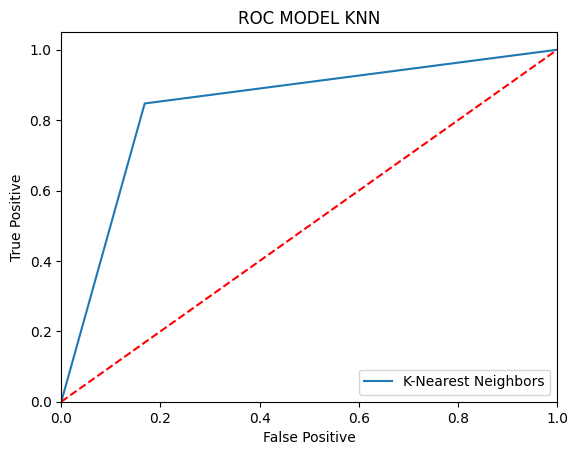


AUC-Skor ROC: 83.96%


In [43]:
# Kurva ROC
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr_knn, tpr_knn)
plt.figure()
plt.plot(fpr_knn, tpr_knn, label = 'K-Nearest Neighbors'%knn_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC MODEL KNN')
plt.legend(loc = "lower right")
plt.show()
print(f"\nAUC-Skor ROC: {round(roc_auc*100, 2)}%")

**Prediksi**

In [48]:
## Prediksi data baru ##
# Data yang diprediksi
Data = [[40, 1, 1, 140, 237, 1, 0, 150, 1, 1.0, 2]]
# Melakukan prediksi berdasarkan data, hasilnya disimpan dalam Y_pred
Y_pred_knn = model_knn.predict(Data)
# Cetak hasil prediksi
if Y_pred_knn == 0:
    print("Hasil Prediksi : Normal")
else:
    print("Hasil Prediksi : Penyakit Jantung")

Hasil Prediksi : Penyakit Jantung


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [49]:
# Membuat data baru dalam bentuk array
data_baru = np.array([[40, 1, 1, 140, 237, 1, 0, 150, 1, 1.0, 2]])
# 1. Memilih banyaknya tetangga (k = 30)
k = k
# 2. Menghitung jarak titik data baru dengan data lama (X_train) menggunakan jarak Euclidean
jarak_euclidean = np.sqrt(np.sum((X_train - data_baru) ** 2, axis=1))
# 3. Mengambil k terdekat
indeks_terdekat = np.argsort(jarak_euclidean)[:k]
# 4. Menghtung jumlah titik data dalam setiap kategori di antara 30 tetangga terdekat
jumlah_kelas_0 = np.sum(y_train.iloc[indeks_terdekat] == 0)
jumlah_kelas_1 = np.sum(y_train.iloc[indeks_terdekat] == 1)
# 5. Menetapkan data baru ke dalam kategori yang memiliki jumlah tetangga terbanyak
hasil_prediksi = 1 if jumlah_kelas_1 > jumlah_kelas_0 else 0
# Cetak hasil prediksi
if hasil_prediksi == 0:
    print("Hasil Prediksi : Normal")
else:
    print("Hasil Prediksi : Penyakit Jantung")

Hasil Prediksi : Penyakit Jantung


# **Support Vector Machine**

**Melatih Model**

In [50]:
## Membangun model SVM ##
# Membuat model SVM
modelsvm = SVC()
# Melakukan tuning parameter
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}
grid_search = GridSearchCV(modelsvm, param_grid, cv=5)
# Menemukan kombinasi parameter optimal
grid_search.fit(X_train, y_train)
# Kombinasi parameter optimal
best_svm = grid_search.best_estimator_
# Menampilkan parameter optimal
print('Kombinasi parameter optimal:',  grid_search.best_params_)

Kombinasi parameter optimal: {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


In [51]:
## Tuning parameter ##
# Inisialisasi daftar parameter yang akan diuji
nilai_C = [0.1, 1, 10, 100]
fungsi_kernel = ['linear', 'rbf', 'poly']
nilai_gamma = ['scale', 'auto']
derajat_poly = [2, 3, 4]

# Inisialisasi variabel untuk menyimpan parameter terbaik dan akurasi terbaik
best_params = {}
best_accuracy = 0.0

# Inisialisasi objek KFold untuk validasi silang
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi variabel untuk menyimpan akurasi dari setiap iterasi
all_accuracies = []

# Melakukan iterasi untuk setiap kombinasi parameter
for C in nilai_C:
    for kernel in fungsi_kernel:
        for gamma in nilai_gamma:
            for degree in derajat_poly:
                # Inisialisasi model SVM dengan parameter tertentu
                modelsvm = SVC(C=C, kernel=kernel, gamma=gamma, degree=degree)
                # Menyimpan akurasi
                accuracies = []
                # Melakukan validasi silang
                for train_index, val_index in kf.split(X_train):
                    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
                    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
                    # Melatih model pada setiap lipatan
                    modelsvm.fit(X_train_fold, y_train_fold)
                    # Mengukur akurasi pada setiap lipatan
                    y_pred_fold = modelsvm.predict(X_val_fold)
                    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
                    accuracies.append(accuracy_fold)
                # Menghitung rata-rata akurasi dari semua lipatan
                mean_accuracy = np.mean(accuracies)
                # Memeriksa apakah akurasi yang dihasilkan lebih baik dari yang sebelumnya
                if mean_accuracy > best_accuracy:
                    best_accuracy = mean_accuracy
                    best_params = {'C': C, 'kernel': kernel, 'gamma': gamma, 'degree': degree}
                # Menyimpan akurasi dari setiap iterasi
                all_accuracies.append({'C': C, 'kernel': kernel, 'gamma': gamma, 'degree': degree, 'accuracy': mean_accuracy})

# Menampilkan parameter terbaik
print('Kombinasi parameter optimal:', best_params)

# Menampilkan akurasi dari setiap iterasi
print("Akurasi dari setiap iterasi:")
for i, acc in enumerate(all_accuracies, 1):
    print(f"Iterasi {i}: C={acc['C']}, kernel={acc['kernel']}, gamma={acc['gamma']}, degree={acc['degree']}, Accuracy={acc['accuracy']}")

Kombinasi parameter optimal: {'C': 10, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 2}
Akurasi dari setiap iterasi:
Iterasi 1: C=0.1, kernel=linear, gamma=scale, degree=2, Accuracy=0.8277101129787822
Iterasi 2: C=0.1, kernel=linear, gamma=scale, degree=3, Accuracy=0.8277101129787822
Iterasi 3: C=0.1, kernel=linear, gamma=scale, degree=4, Accuracy=0.8277101129787822
Iterasi 4: C=0.1, kernel=linear, gamma=auto, degree=2, Accuracy=0.8277101129787822
Iterasi 5: C=0.1, kernel=linear, gamma=auto, degree=3, Accuracy=0.8277101129787822
Iterasi 6: C=0.1, kernel=linear, gamma=auto, degree=4, Accuracy=0.8277101129787822
Iterasi 7: C=0.1, kernel=rbf, gamma=scale, degree=2, Accuracy=0.8203692477266464
Iterasi 8: C=0.1, kernel=rbf, gamma=scale, degree=3, Accuracy=0.8203692477266464
Iterasi 9: C=0.1, kernel=rbf, gamma=scale, degree=4, Accuracy=0.8203692477266464
Iterasi 10: C=0.1, kernel=rbf, gamma=auto, degree=2, Accuracy=0.8277266464590797
Iterasi 11: C=0.1, kernel=rbf, gamma=auto, degree=3, Accurac

**Evaluasi Model**

In [52]:
## Mengevaluasi model SVM ##
# Menguji model menggunakan data uji (X_test)
y_pred_svm = best_svm.predict(X_test)
# Menghitung metrik evaluasi: akurasi, presisi, recall, dan F1 score
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
# Menampilkan metrik evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8907563025210085
Precision: 0.8723404255319149
Recall: 0.9389312977099237
F1 Score: 0.9044117647058824


In [53]:
# Menampilkan prediksi
y_pred_svm

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [54]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix SVM:")
print(cm_svm)

Confusion Matrix SVM:
[[ 89  18]
 [  8 123]]


In [55]:
# Laporan Klasifikasi (Classification Report)
cr_svm = classification_report(y_test, y_pred_svm)
print("\nClassification Report SVM:")
print(cr_svm)


Classification Report SVM:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       107
           1       0.87      0.94      0.90       131

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238



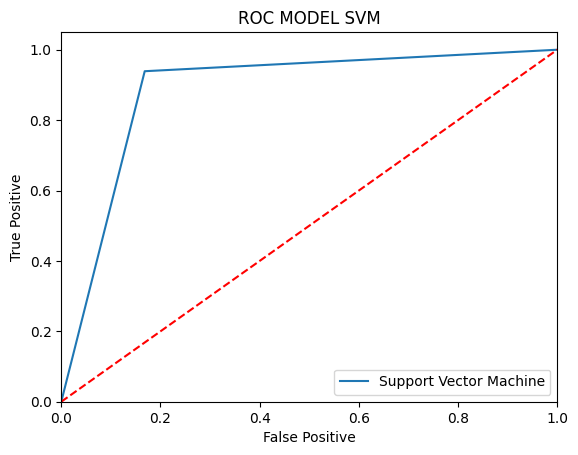


AUC-Skor ROC: 88.54%


In [56]:
# Kurva ROC
svm_roc_auc = roc_auc_score(y_test, y_pred_svm)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr_svm, tpr_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, label = 'Support Vector Machine'%svm_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC MODEL SVM')
plt.legend(loc = "lower right")
plt.show()
print(f"\nAUC-Skor ROC: {round(roc_auc*100, 2)}%")

**Prediksi**

In [57]:
## Prediksi data baru ##
# Data yang diprediksi
Data = [[40, 1, 1, 140, 237, 1, 0, 150, 1, 1.0, 2]]
# Melakukan prediksi berdasarkan data, hasilnya disimpan dalam Y_pred
Y_pred_svm = best_svm.predict(Data)
# Cetak hasil prediksi
if Y_pred_svm == 0:
    print("Hasil Prediksi : Normal")
else:
    print("Hasil Prediksi : Penyakit Jantung")

Hasil Prediksi : Penyakit Jantung


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [59]:
# Menghitung koefisien lagrange sebagai parameter bobot (w)
alpha = best_svm.dual_coef_
# Menghitung support vector (xi)
support_vectors = best_svm.support_vectors_
# Menghitung bias (b)
bias = best_svm.intercept_
# Menampilkan parameter
print("Alpha :", alpha)
print("Support Vectors :", support_vectors)
print("Bias :", bias)

Alpha : [[-1.00000000e+01 -1.00000000e+01 -1.00000000e+01 -1.00000000e+01
  -1.00000000e+01 -1.00000000e+01 -1.00000000e+01 -1.00000000e+01
  -1.00000000e+01 -1.00000000e+01 -5.20565985e+00 -4.33440990e-01
  -6.84535575e+00 -5.34490183e+00 -1.00000000e+01 -5.00576374e-01
  -2.80843152e+00 -6.99653498e+00 -1.00000000e+01 -1.00000000e+01
  -5.08630605e+00 -4.25595802e+00 -1.00000000e+01 -1.00000000e+01
  -1.00000000e+01 -1.00000000e+01 -4.20076444e+00 -3.53017766e+00
  -1.00000000e+01 -4.36238579e-02 -2.06844655e+00 -1.00000000e+01
  -7.56913898e+00 -1.00000000e+01 -1.00000000e+01 -2.76597647e-01
  -1.00000000e+01 -1.00000000e+01 -1.00000000e+01 -1.00000000e+01
  -4.34892222e-01 -1.00000000e+01 -1.18215482e+00 -1.00000000e+01
  -1.00000000e+01 -6.09089661e+00 -1.00000000e+01 -1.00000000e+01
  -6.13899166e+00 -1.00000000e+01 -5.94368643e+00 -1.72277154e-02
  -5.02729565e-01 -4.16531062e+00 -1.62994905e-02 -1.00000000e+01
  -1.00000000e+01 -5.00194098e+00 -1.00000000e+01 -1.00000000e+01
  

In [60]:
# Mengakses data latih
X_train
# Menampilkan xi (support vectors)
print("Support Vectors (xi):")
for i, vector in enumerate(support_vectors):
    print("x_{}: {}".format(i, vector))
# Menampilkan yi (kelas target)
print("Labels (yi):", y_train)

Support Vectors (xi):
x_0: [-0.29079427  1.          4.         -0.0083754   0.07532349  1.
  2.         -0.02872841  0.         -0.79225256  1.        ]
x_1: [-0.93221257  1.          3.         -1.20656044 -2.07504728  0.
  0.         -0.06793347  0.         -0.01956849  1.        ]
x_2: [ 0.24372099  1.          2.         -0.66193088  0.29233338  0.
  0.          1.14742339  0.         -0.88616473  3.        ]
x_3: [-0.82530952  1.          4.         -1.20656044  0.27260521  0.
  1.          0.01047665  1.          0.05295695  2.        ]
x_4: [ 0.13681794  1.          3.         -0.66193088  0.09505166  0.
  2.         -0.22475371  0.         -0.88616473  1.        ]
x_5: [ 0.99204235  1.          4.         -0.33515314 -2.07504728  0.
  1.         -0.77362455  0.          0.52251779  3.        ]
x_6: [-0.61150342  0.          4.          0.97195782  0.16410026  0.
  0.         -0.38157395  1.          0.05295695  2.        ]
x_7: [-0.07698816  1.          4.          0.53625417 

In [61]:
## Fungsi kernel ##
# Kernel yang digunakan
kernel = best_svm.kernel
print("Fungsi kernel SVM:", kernel)
# Menampilkan parameter internal
gamma = best_svm._gamma
print("Parameter gamma:", gamma)

Fungsi kernel SVM: rbf
Parameter gamma: 0.09090909090909091


In [62]:
# Mendefinisikan fungsi untuk menghitung nilai kernel antara fitur dan terget
def fungsi_kernel(X, Y):
    if kernel == 'rbf':
        # Rumus fungsi kernel RBF
        return np.exp(-gamma * np.linalg.norm(X - Y) ** 2)
    elif kernel == 'linear':
        # Rumus fungsi kernel linear
        return np.dot(X, Y.T)
    elif kernel == 'poly':
        # Rumus fungsi kernel polynomial
        return (gamma * np.dot(X, Y.T) + 1) ** best_svm.degree
# Menghitung nilai prediksi
# Mendefinisikan fungsi prediksi
def prediksi(data_baru):
    # Melakukan inisialisasi
    hasil_prediksi = bias
    # Looping for untuk melakukan prediksi
    for i in range(len(alpha[0])):
        # Menghitung prediksi
        hasil_prediksi += alpha[0][i] * best_svm.dual_coef_[0][i] * fungsi_kernel(support_vectors[i], data_baru)
    return np.sign(hasil_prediksi).astype(int)
# Melakukan prediksi
Y_pred_svm = prediksi(data_baru)
if Y_pred_svm == 0:
    print("Hasil Prediksi : Normal")
else:
    print("Hasil Prediksi : Penyakit Jantung")

Hasil Prediksi : Penyakit Jantung
